<a href="https://colab.research.google.com/github/alexlopespereira/machine_learning/blob/main/Notebooks/Aula3/Aula3_03_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Diabetes com o Dataset Pima Indians Diabetes

Neste notebook, utilizaremos o dataset Pima Indians Diabetes para construir um classificador de rede neural utilizando o `MLPClassifier` do scikit-learn. O fluxo do notebook inclui:
- Carregamento do dataset
- Preparação dos dados
- Pré-processamento (padronização)
- Treinamento do modelo
- Avaliação dos resultados

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

## Carregamento do Dataset

Utilizaremos o `fetch_openml` para carregar o dataset "PimaIndiansDiabetes". Esse dataset contém 768 amostras com 8 atributos numéricos e uma coluna alvo que indica se o paciente é diabético (1) ou não (0).

In [ ]:
# Carrega o dataset Pima Indians Diabetes
pima = fetch_openml(name='diabetes', as_frame=True)
df = pima.frame

# Exibe as primeiras linhas do dataset
print(df.head())

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=37
- version 5, status: active
  url: https://www.openml.org/search?type=data&id=42608

  warn(warning_msg)


   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


## Preparação dos Dados

Neste passo, separamos as features (atributos) da variável alvo e realizamos a divisão dos dados em conjuntos de treino e teste. Utilizaremos 80% dos dados para treino e 20% para teste, mantendo a proporção das classes com o parâmetro `stratify`.

In [ ]:
# Separa as features e a variável alvo
X = df.drop(columns='class')
#y = df['class'].astype(int)
# O código acima não funciona porque a coluna class contem as strings tested_positive e tested_negative. Converta esta coluna para inteiro (0 ou 1) e guarde o resultado na variavel y

# Divide os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Pré-processamento: Padronização

Como todas as colunas são numéricas, utilizamos o `StandardScaler` para padronizar os dados. Essa técnica transforma as features para terem média 0 e desvio padrão 1, o que pode ajudar na convergência do modelo.

In [ ]:
# Inicializa e ajusta o StandardScaler nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Definição e Treinamento do Modelo

Utilizaremos o `MLPClassifier` do scikit-learn para construir uma rede neural com duas camadas ocultas. As camadas terão 64 e 32 neurônios, respectivamente. Configuramos a função de ativação `relu`, o solver `adam` e ativamos o early stopping para prevenir overfitting.

### Função de Ativação Relu

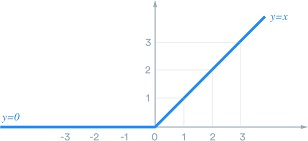

### O Solver adam
Adam (Adaptive Moment Estimation) combina duas características importantes:

*   Ajusta automaticamente a taxa de aprendizado (learning rate) para cada parâmetro
*   Utiliza médias móveis dos gradientes para melhorar a convergência


    


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(64, 32),
                      activation='relu',
                      solver='adam',
                      max_iter=200,
                      random_state=42,
                      early_stopping=True)

# Treina o modelo com os dados padronizados
model.fit(X_train_scaled, y_train)

## Avaliação do Modelo

Após o treinamento, avaliamos o desempenho do modelo utilizando o conjunto de teste. Calculamos a acurácia e geramos um relatório de classificação detalhado (precisão, recall, f1-score).

In [ ]:
# Realiza as previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Calcula a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

# Exibe o relatório de classificação
print(classification_report(y_test, y_pred))

## Nova iteração com validação cruzada (K-Fold)

## O parâmetro shuffle na classe StratifiedKFold
Controla se as amostras de cada classe serão embaralhadas antes de serem divididas em lotes. Quando ```shuffle=True```:

*   As amostras X e y são embaralhadas aleatoriamente ao mesmo tempo, mantendo a correspondência entre features e rótulos
*   A distribuição das classes é preservada em cada fold (mantém a mesma porcentagem de amostras por classe)
*   O parâmetro random_state pode ser usado para controlar a aleatoriedade do embaralhamento e garantir resultados reproduzíveis



### Impacto no Treinamento
O uso de ```shuffle=True``` é especialmente importante quando:

*   Os dados não estão distribuídos aleatoriamente no dataset original
*   Existem padrões sequenciais nos dados que podem afetar o treinamento
*   Há desbalanceamento de classes com amostras consecutivas da mesma classe


In [ ]:
skf = StratifiedKFold(n_splits=5, # Qual o significado deste argumento
                      shuffle=True,
                      random_state=42)


In [ ]:

accuracy_scores = []
fold = 1

for train_index, test_index in skf.split(X, y):
    print(f"\n=== Fold {fold} ===")

    # Separação dos dados para o fold atual
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # =============================================================================
    # Pré-processamento: Padronização dos Dados
    # =============================================================================
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # =============================================================================
    # Definição e Treinamento do Modelo de Rede Neural
    # =============================================================================
    model = MLPClassifier(hidden_layer_sizes=(64, 32),
                          activation='relu',
                          solver='adam',
                          max_iter=200,
                          random_state=42,
                          early_stopping=True)

    model.fit(X_train_scaled, y_train)

    # =============================================================================
    # Avaliação do Modelo para o Fold Atual
    # =============================================================================
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    print(f"Acurácia no Fold {fold}: {acc:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    fold += 1

# =============================================================================
# Resultados Agregados
# =============================================================================
mean_accuracy = np.mean(accuracy_scores)
print("===================================")
print(f"Acurácias de cada fold: {accuracy_scores}")
print(f"Acurácia média: {mean_accuracy:.4f}")


# Exercício 1
### Altere o experimento para usar o método cross_validate em vez da classe StratifiedKFold


     


# Exercício 2
### Implemente um Pipeline. Inclua um ColumnTransformer no pipeline. E retreine o modelo.

# Exercício 3
### Faça uma otimização de hiperparâmetros utilizando um método de busca automatizado